<a href="https://colab.research.google.com/github/amshukethireddy/MultipleLinearRegression/blob/main/Multiple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MSE:  1684.969392885663
w:  [ 7.38649762 17.6612022   0.30653715  0.81499231  0.55579628]
b:  55.222415876496
MSE:  2.075678541784548


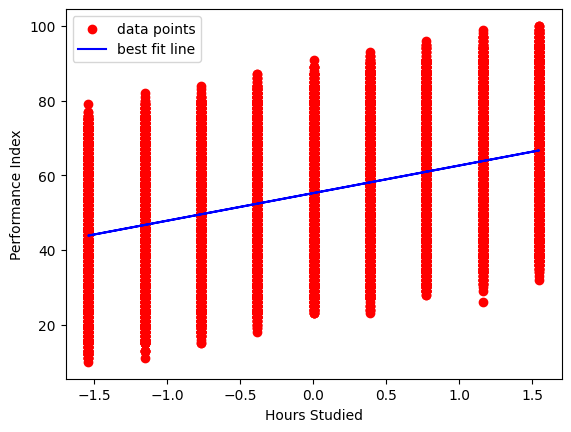

In [32]:
'''Linear Regression with multiple features from scratch'''
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

'''
plotting
inputs: x-independent variable
        y-dependent variable
        y_hat:predicted y value
        feature_index:to plot graph with respect to particular variable
        feature_name:name of the feature used
output: plots the graphs(line and scatter) based on the given input
'''
def plot(x, y, y_hat, feature_index, feature_name):
    plt.scatter(x[:, feature_index], y, color='red', label='data points')  # plotting data points using the selected feature
    plt.plot(x[:, feature_index], y_hat, color='blue', label='best fit line')  # plotting the best fit line
    plt.xlabel(feature_name)
    plt.ylabel('Performance Index')
    plt.legend()
    plt.show()

'''
For calculation y_hat value(y predicted/target variable)
inputs: x-independent varible(feature-tupple)
        w-slope/wights
        b-bias/y-intercept
ouput: returns y_hat value
'''
def predict(x, w, b):
    y_hat = x.dot(w) + b  # y_pred = wx + b(dot product is prefered as w is a vector)
    return y_hat



'''
To compute the cost function
inputs: x-independent varible(feature-tupple)
        y-dependent variable
        w-slope/wights
        b-bias/y-intercept
output: returns the cost
formula:mean squared error=((y_pred-y)^2)/2m
'''

def cost(x, y, w, b):
    m = len(y)  # Number of training examples
    y_hat = predict(x, w, b)  # Compute the y_hat
    errors = y_hat - y  # Compute the errors
    mse = (1 / (2 * m)) * sum(errors ** 2)  # Compute the mean squared error
    print("MSE: ",mse)
    return mse


'''
To compute Gradient Descent
inputs: x-independent varible(feature-tupple)
        y-dependent variable
        w-slope/wights
        b-bias/y-intercept
        learning rate(alpha)
        itertions
output: gradient descent is computed

'''

def gradient(x, y, w, b, learning_rate, iterations):
    m = len(y)
    for _ in range(iterations):
        y_hat = predict(x, w, b)
        errors = y_hat - y
        dw = (1/m) * (x.T.dot(errors))  # derivative for w
        db = (1/m) * sum(errors)  # derivative for b
        w = w - learning_rate * dw  # Update weights
        b = b - learning_rate * db  # Update bias
    return w, b


'''
To read the input values and print the output values
'''
def main():
    data = pd.read_csv('Student_Performance.csv')#reading data
    #removing nan values
    if data.isnull().values.any():
        data = data.dropna()
    data['Extracurricular Activities'] = (data['Extracurricular Activities'] == 'Yes') * 1. #converting into numerical
    x = data.drop('Performance Index',axis=1)
    y = data['Performance Index'].values
    # Normalize the features using the standard scalar from sklearn
    scaler = StandardScaler()
    x = scaler.fit_transform(x)
    w = np.ones(x.shape[1])  # Initialize weights as ones [1,1]
    b = 0
    mse=cost(x,y,w,b)
    learning_rate = 0.01 # Reduce the learning rate
    iterations = 1000
    w, b = gradient(x, y, w, b, learning_rate, iterations)
    print("w: ",w)
    print("b: ",b)
    mse=cost(x,y,w,b)
    #For plotting, let's choose the first feature 'Hours Studied' and fix the all the other features to its mean value
    feature_index = 0  # Index of 'Hours Studied'
    feature_name = 'Hours Studied'
    x_plot = x.copy()
    for i in range(x.shape[1]):
      if i != feature_index:
        x_plot[:, i] = np.mean(x[:, i])
    y_hat = predict(x_plot, w, b)
    plot(x, y, y_hat, feature_index, feature_name)



if __name__ == "__main__":
    main()



MSE:  4.073002572635991
reg_score:  0.989010089843778


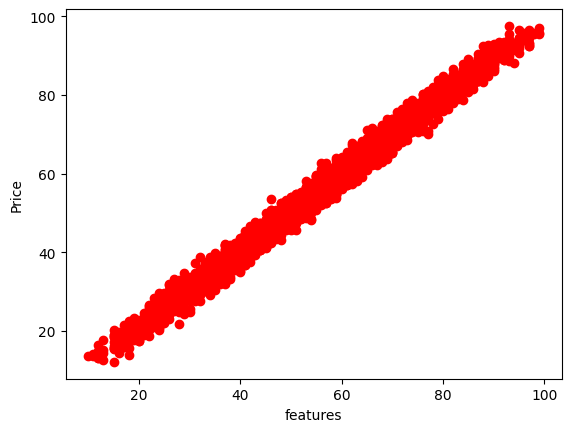

In [33]:
'''Linear regression with multiple features using built in functions from sklearn package'''
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


data=pd.read_csv("Student_Performance.csv")
data['Extracurricular Activities'] = (data['Extracurricular Activities'] == 'Yes') * 1 #converting into numerical
x=data.drop('Performance Index',axis=1)
y=(data['Performance Index']).values
scaler = StandardScaler()
x = scaler.fit_transform(x)
data.isnull().sum()
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)
reg=LinearRegression()#linear regression
reg.fit(x_train,y_train)
predicts=reg.predict(x_test)
mse=mean_squared_error(y_test,predicts)
print("MSE: ",mse)
print("reg_score: ",reg.score(x_test,y_test))

plt.scatter(y_test,predicts,color='red')
plt.xlabel('features')
plt.ylabel('Price')
plt.show()


